In [2]:
import numpy as np
import matplotlib.pyplot as plt

2.1 Вычислить функцию:

In [3]:
def f(x,w,b):
    return np.dot(x,w)+b
x = np.array([1,2,3])
w = np.array([2,3,4])
b = 2
f(x,w,b)    

22

2.2 На отрезке [-5;5] построить графики функций

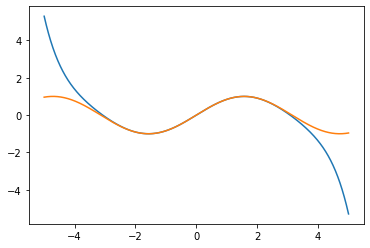

In [15]:
def f(x):
    return x - x**3/6 + x**5/120 - x**7/5040
x = np.linspace(-5,5,1000)
plt.plot(x, f(x), x, np.sin(x))

2.3 Нарисовать в matplotlib окружность заданного радиуса r.

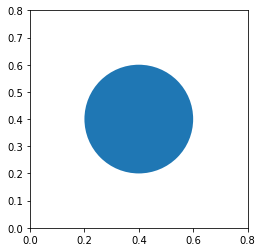

In [16]:
r = 0.2
circle1 = plt.Circle((r*2, r*2), r)
ax = plt.gca()
ax.cla()
ax.set_aspect(1)
ax.set_xlim((0, r*4))
ax.set_ylim((0, r*4))

ax.add_patch(circle1)

2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2.
Отрисуйте на одном графике оригинальные точки, на втором - точки после преобразования при помощи матрицы.
Отобразите точки таким образом, чтобы было понятно, какая из точек на первом графике соответствует какой точке на втором

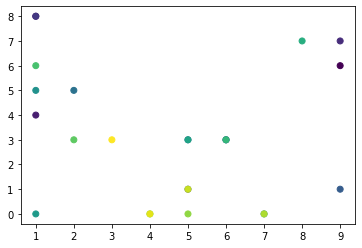

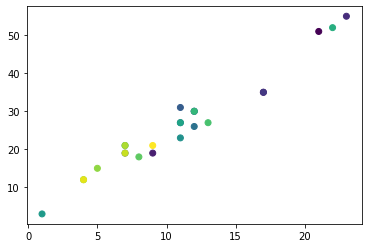

In [17]:
def transformation_plot(dots, m):
    n_dots = np.copy(dots)
    c = range(0,1000,40)
    for i in range(len(dots)):
        n_dots[i] = np.dot(m, dots[i])
    plt.scatter( dots[:,0],dots[:,1],c=c)
    plt.show()
    plt.scatter( n_dots[:,0],n_dots[:,1], c= c)
    plt.show()
    
x = np.random.randint(0, 10, size = 50)
x.resize(25,2)
transformation_plot( x, np.array([[1,2],[3,4]]))

2.5 Задайте некоторую функцию одной переменной f(x) (тут x**2 + 2x + 1):
Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение.
Сравните для проверки с аналитическим выражением производной.

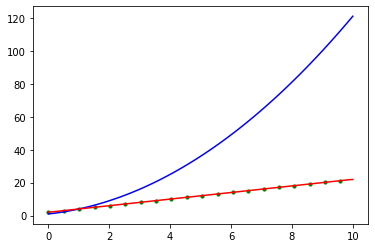

In [18]:
x = np.linspace(0,10,100)
dx = x[1]-x[0]
def f(x):
    return x**2 + 2*x + 1
dydx = np.gradient(f(x), dx)
#plt.plot(x, f(x), c = 'blue')
plt.plot(x, dydx, c = 'red')
plt.scatter(x[::5], 2*x[::5]+2, c = 'green', s = 10)

2.6 Дано множество векторов V размерности d. Дан вектор q такой же размерности. Определить:
а) Пропорцию векторов v в V, для которых угол(v,q) < 90 градусов
б) Пропорцию векторов v в V, для которых угол(v,q) < 30 градусов

In [117]:

r = np.random.randint(2,10)
V = np.random.randint(0, 100, size = 1000 - 1000%r)
V.resize(1000//r,r)
q = np.random.randint(0, 100, size = r)

mx = np.linalg.norm(q)

my = np.linalg.norm(V, axis= 1)
angle_r = np.arccos((np.dot(V,q)/(mx*my)))
angle = np.degrees(angle_r)
is_angle_les_90 = angle < 90
is_angle_les_30 = angle < 30
print ("Пропорция векторов v в V, для которых угол(v,q) < 90 градусов:", sum(is_angle_les_90)/(1000//r))
print ("Пропорция векторов v в V, для которых угол(v,q) < 30 градусов:", sum(is_angle_les_30)/(1000//r))
    
    

Пропорция векторов v в V, для которых угол(v,q) < 90 градусов: 1.0
Пропорция векторов v в V, для которых угол(v,q) < 30 градусов: 0.44


2.7 Дан гиперкуб и вписанная в него гиперсфера. Через сэмплинг точек внутри гиперкуба, оценить отношение объёма гиперсферы к объёму гиперкуба. Вывести график этой пропорции в зависимости от размерности пространства d.

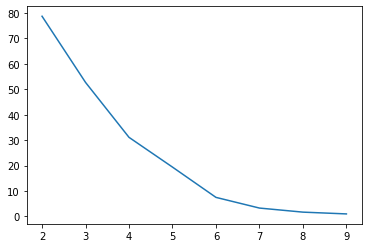

In [99]:
hits = []
r = 10
for d in range(2,10):
    hit = 0
    points = np.random.random(size = (1000, d)) * r
    for point in points:
        if (np.sum(np.dot(point, point)) < r**2):
            hit += 1 
    hits.append(hit/10)
plt.plot(range(2,10), hits)
    


3.2 Дан граф друзей из соцсети VK (vk.gml):
Необходимо:
1) Определить число уникальных пользователей
2) Для каждого id пользователя определить число его друзей из данного графа. Вывести топ 15. Учитывать неориентированность графа. Посчитать среднее и медианное число друзей.
3) Для всех возможных пар пользователей (декартова произведения):
Для длин L 1..6 определить пропорцию пар пользователей, для которой кратчайший путь между пользователями в паре составляет L. 
Определить пропорцию, для которой этот путь больше 6 (или не существует).
Убедиться, что полученные пропорции суммируются в 1.

In [70]:
import networkx as nx
from collections import defaultdict

In [71]:
graf = nx.read_gml("vk.gml")
nodes = graf.nodes
edges = graf.edges
print ("Число уникальных пользоватлей: ", len(nodes))
frend_counter = np.array([])
for node in nodes:
    frend_counter = np.append(frend_counter, len(graf.edges(node)))
top_15_index = np.argsort(frend_counter)[::-1]
for i in range(15):
    print(i+1, '-е место пользователь', list(nodes)[top_15_index[i] ], ', количество друзей: ', int(frend_counter[top_15_index[i]]))
print('Cpeднее число друзей: ', np.average(frend_counter))
print('Медианное число друзей: ', np.median(frend_counter))

l_to_couple = np.zeros(7)
path = list(nx.all_pairs_shortest_path_length(graf))


Число уникальных пользоватлей:  3766
1 -е место пользователь 154572605 , количество друзей:  351
2 -е место пользователь 136435809 , количество друзей:  211
3 -е место пользователь 34847138 , количество друзей:  210
4 -е место пользователь 1997236 , количество друзей:  178
5 -е место пользователь 472893795 , количество друзей:  178
6 -е место пользователь 270418723 , количество друзей:  167
7 -е место пользователь 246825563 , количество друзей:  155
8 -е место пользователь 120109289 , количество друзей:  148
9 -е место пользователь 83372852 , количество друзей:  146
10 -е место пользователь 94780691 , количество друзей:  140
11 -е место пользователь 63962118 , количество друзей:  136
12 -е место пользователь 150491520 , количество друзей:  135
13 -е место пользователь 94509311 , количество друзей:  135
14 -е место пользователь 122784747 , количество друзей:  132
15 -е место пользователь 41459412 , количество друзей:  130
Cpeднее число друзей:  21.98884758364312
Медианное число друзей: 

In [79]:
for i in range(len(nodes)):
    for j in range(i+1 ,len(nodes)):
        try:
            path[i][1][list(nodes)[j]]
        except KeyError:
            l_to_couple[6] += 1
            continue
        if path[i][1][list(nodes)[j]] > 6:
            l_to_couple[6] += 1
        else:
            l_to_couple[path[i][1][list(nodes)[j]]-1] += 1
print(l_to_couple)

[  83248. 1442073. 6249628. 4717791. 1147977.  178676.  415315.]


In [96]:
save = l_to_couple

In [120]:
total_count = (len(nodes)**2 - len(nodes))
total_count

14178990

In [91]:
print ('Пропорция пар пользователей, для которой кратчайший путь между пользователями в паре составляет L: ',(l_to_couple)[0]/(total_count))
print ('Пропорция пар пользователей, для которой кратчайший путь между пользователями в паре составляет >6L или отсутвует: ',(l_to_couple)[6]/(total_count))

Пропорция пар пользователей, для которой кратчайший путь между пользователями в паре составляет L:  0.005871222139235587
Пропорция пар пользователей, для которой кратчайший путь между пользователями в паре составляет >6L или отсутвует:  0.029290873327366757


In [93]:
np.sum(l_to_couple/(total_count))

1.0039296169896446